# Project - Used Car Prices in United States

## Team Background

- Project Grp 08

### Team Members

- Team member 1
    - Name: Richard Anton
    - Email: [rna63@drexel.edu](mailto:rna63@drexel.edu)
    
I am a MS CS student at Drexel. I expect to complete my degree in June 2023 at the end of the next quarter.
I have been a software developer since 1995, and have significant experience with Python.

I have some hands on experience with machine learning, and have taken machine learning, deep learning, artificial intellience, computer vision and DSCI-501 courses at Drexel.

I do not have as much background with exploratory data analysis. I do have a fairly solid mathematical background, including basic statistics.

A number of the prior projects that I have worked on have been focused on classification, for example of images or sentiment analysis of textual data.

Since much of my experience with handling data sets for machine learning problems has been through graduate CS courses, I have implemented them typically without a dependency on anything but NumPy and matplotlib for visualizing results, which means I have limited experience with existing common tools like scikit-learn. 

I am competent at using LaTex, but not an advanced user.

I have significant experience with NumPy and some experience using Pandas. I also have experience with matplotlib for visualizing aspects of data, but less with Seaborn.

The areas and skills I would like to grow through this project are:

1. More hands-on experience with scikit-learn and Pandas libraries.
2. More practice with visualization tools, such as matplotlib and Seaborn.
3. More practical experience with investigating a dataset, i.e. what data cleaning is needed and what relationships can be discovered in the data.
4. Experience with a practical machine learning regression problem.
5. Feature selection techniques to make machine learning problems more effective.


## Topic 

I would like to better understand how different variables influence the price of used vehicles.
During COVID-19 supply problems, used car prices increased significantly when new car availability decreased which caused some of my curiousity in this area.

Additionally, I have always been interested in cars overall, and have bought and sold a number of older and sometimes antique vehicles, and it would be of practical use to be better able to understand what is a fair price.

This purpose is also applicable to user car vendors, consumers selling their used vehicles privately or as trade-ins, new car dealerships purchasing trade-in vehicles, and car information websites such as [edmunds.com](http://www.edmunds.com) and [Kelly Blue Book](http://www.kbb.com) that provide price range information for vehicles based on vehicle details.

I want to investigate what factors influence used car prices compared to the obvious ones of age and odomoter mileage. I also want to understand other relationships between variables such as how much make and model affects the price for different age vehicles compared to the condition, or how much location affects the price of similar vehicles.

I am interested exploring a regression problem on tabular data with different types of input features since I have more experience to date with classification.

I think this is a good topic to expand my experience with visualization techniques, gain experience with practical data preparation, and practice using relevant libraries and frameworks, especially scikit-learn, Pandas, and XGBoost.

Particular techniques I want to investigate in part two of this project are

- Basic regression techniques for this problem, such as linear, ridge and lasso regression
- Regression using ensemble models, such as Random Cut Forest and XGBoost
- Feature selection techniques.
    - Using Random Forest and/or XGBoost model to evaluate feature importance.

In addition to the already described objectives, if time permits, I plan to choose the best performing regression model and embed it into a [Streamlit](https://streamlit.io/) project to create a web tool which can take a set of inputs and predict the price of a used car.


## Datasets Available

There are a number of datasets available related to used cars listing or sales. They have different features, different sizes of samples and some are more prepared and preprocessed than others.

These relevant datasets located include:

- **Cargurus:** <https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset>
    - This dataset contains rows with 66 columns for three million user car listings.
    - This dataset was created from Cargurus inventory in September 2020 using a crawler built by the owner of the Kaggle dataset.
- **TrueCar:** https://www.kaggle.com/datasets/jpayne/852k-used-car-listings
    - The provider created this dataset by scraping TrueCar.com for used car listings on 9/24/2017.
    - Columns include year, make, model, price, VIN, city, state
- **Craigslist:** https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
    - This dataset was created by the provider scraping data from Craigslist car listings.
    - The columns include price, condition, manufacturer, and latitude/longitude plus 18 other categories.
- **Carvana:** https://www.kaggle.com/datasets/ravishah1/carvana-predict-car-prices
    - This data is based on Carvana car sales, and only contains about 22,000 rows with four columns.
- **USDOT:** https://catalog.data.gov/dataset/auto-sales
    - This is available through the government bts.gov system at <https://data.bts.gov/Research-and-Statistics/Auto-Sales/7n6a-n5tz>. It seems to be primarily a historic aggregate time series of new car sales in the USA. It is part of the monthly transportation statistics published by the US Department of Transportation. It does not seem very useful to the objectives of this project. It does provide some contextual timeseries data for volume of new cars to compare against used car prices by year.

Before completing exploratory data analysis it seems likely that the Cargurus and/or Craigslist datasets would be most useful for this analysis, but this also depends on the quality of the data and effort required to prepare it within the available time so the final choice will be based on the phase one report.


## Analysis of Datasets

### Note on Datasets

*Note* that the code in the cells below will not run unless the data is downloaded and unzipped in advance.

The code expects a dataset directory with the following structure:

```bash
% find datasets -name '*.csv' -or -type d
datasets
datasets/cargurus
datasets/cargurus/used_cars_data.csv
datasets/truecar
datasets/truecar/true_car_listings.csv
datasets/craigslist
datasets/craigslist/vehicles.csv
datasets/carvana
datasets/carvana/carvana.csv
datasets/usdot
datasets/usdot/Monthly_Transportation_Statistics.csv
```

ALl of the CSV filenames are the original names from the ZIP filenames at the Kaggle URLs listed in the cell above.

### Size of Datasets

```bash
% find . -name '*.csv' | xargs wc -l
 3000599 ./datasets/cargurus/used_cars_data.csv
 1233043 ./datasets/truecar/tc20171021.csv
  852123 ./datasets/truecar/true_car_listings.csv
  426881 ./datasets/craigslist/vehicles.csv
   22001 ./datasets/carvana/carvana.csv
     914 ./datasets/usdot/Monthly_Transportation_Statistics.csv
```


## New Car Sales vs Used Cars

Since the US DOT data from bts.gov is an aggregate, monthly timeseries it will not directly help in our regression problem. This is even more true because no datasets were located that contain samples of used car prices over different points in time, rather than a point in time snapshot, so there is no way with the data we found to investigate relationships over time between new car sales and used car prices.

The graph below from the bts.gov based on data collected by the US Department of transportation shows new car sales volume by month.
![Monthly new car sales](images/monthly_new_car_sales.png)

## Exploratory Data Analysis 

An analysis of the characteristics of one of the datasets is shown below using the included code cells and outputs with visualizations.

The code is structured so that the majority of it can be, and was, used to investigate and visualize the data from all four of the used car datasets.  However, for reasons discussed in our summary and brevity, we only include the results for the Craigslist dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import random

In [5]:
sns.set(style="darkgrid")

In [6]:
from IPython.display import display, HTML

In [7]:
class Heading(object):
    template = """<div style="float: left; padding: 10px;">
    <h{size}>{0}</h{size}>
    </div>"""
    def __init__(self, txt, size):
        self.txt = txt
        self.size = size
        
    def _repr_html_(self):
        return self.template.format(self.txt, size=self.size)
    
    def __repr__(self):
        return self.txt

def show_heading(txt, size=2):
    display(Heading(txt, size=size))
    

In [8]:
# This is the configuration for each dataset.
# We drop any columns which are obviously not going to be useful to use for data analysis or regression upon load,
# For example, VIN numbers and URLs to images.

# TODO: turn off sampling for final runs

# we also rename some columns from datasets for consistency (make, model)

datasets = {
    'carvana': {
        'title': "Carvana",
        'path': "datasets/carvana/carvana.csv",
        'sample': False,
        'drop_cols': []
    },
    'craigslist': {
        'title': "Craigslist",
        'path': "datasets/craigslist/vehicles.csv",
        'sample': True,
        'rename_cols': {'manufacturer': 'make'},
        'drop_cols': ['id','url','region','VIN','region_url','county','lat','long','description','image_url','posting_date']
    },
    'cargurus': {
        'title': "Cargurus",
        'path': "datasets/cargurus/used_cars_data.csv",
        'sample': True,
        'rename_cols': {'mileage': 'odometer', 'make_name': 'make', 'model_name': 'model'},
        'drop_cols': [
            'vin', 'description', 'listing_id', 'major_options',
            'wheel_system','trimId', 'sp_id', 'main_picture_url',
            'latitude', 'longitude',
            'is_certified', 'combine_fuel_economy', 'vehicle_damage_category'
        ]
    },
    'truecar': {
        'title': "TrueCar",
        'path': "datasets/truecar/true_car_listings.csv",
        'sample': True,
        'drop_cols': ['Vin']
    }
}

In [9]:
# NOTE: This is where you select the dataset.

#use_dataset = 'cargurus'
use_dataset = 'craigslist'
#use_dataset = 'carvana'
#use_dataset = 'truecar'

dataset = datasets[use_dataset]
dataset_title = dataset['title']
ds_path = dataset['path']


In [10]:

if dataset['sample']:
    p = 0.01  # Keep 1% of the data for faster experimentation in phase 1.
    orig_df = pd.read_csv(
         ds_path,
         header=0, 
         low_memory=False,
         skiprows=lambda i: i>0 and random.random() > p
    )
else:
    orig_df = pd.read_csv(ds_path, low_memory=False)

In [11]:
def describe_col(colname, df):
    show_heading("Column: {}".format(colname))

    if is_numeric_dtype(df[colname]):    
        print("Numeric")
        if df[colname].dtype == 'int64':
            fmt = "{0:.0f}"
        else:
            fmt = "{0:.5f}"
    else:
        if is_string_dtype(df[colname]):
            print("String")
        else:
            print("Other")
        fmt = "{}"
    d = df[colname].describe().apply(fmt.format)
    display(d)
    uvals = df[colname].unique()
    #value_counts()
    print("unique_values(max 10):")
    
    display(uvals[:10])
    
    

In [12]:
def describe_data(title, df, verbose=True):
    show_heading("Dataset Name: {}".format(title), size='1')

    show_heading("Info", size=3)
    print("Shape:", df.shape)
    display(df.info())
    
    show_heading("Sample", size=3)
    pd.set_option('display.max_columns', None)
    display(df.head())
    
    show_heading("Types", size=3)
    display(df.dtypes)

    show_heading("Null Proportion", size=3)
    null_ratio = df.isnull().sum()/len(df.index)
    display(null_ratio)
    print("Null Counts")
    display(df.isnull().sum().sort_values())

    if verbose:
        for colname in df.columns:
            describe_col(colname, df)

In [13]:
# Drop any columns we don't want and set df var.
df = orig_df

print("Original Columns:", df.columns)



if dataset['drop_cols']:
    print("Dropping:")
    display(dataset['drop_cols'])
    df = orig_df.drop(columns=dataset['drop_cols'])
    

# Rename any columns as needed.
if 'rename_cols' in dataset and dataset['rename_cols']:
    print("Renaming:")
    display(dataset['rename_cols'])
    df = df.rename(columns=dataset['rename_cols'])

print("Using Columns:", df.columns)

Original Columns: Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')
Dropping:


['id',
 'url',
 'region',
 'VIN',
 'region_url',
 'county',
 'lat',
 'long',
 'description',
 'image_url',
 'posting_date']

Renaming:


{'manufacturer': 'make'}

Using Columns: Index(['price', 'year', 'make', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')


In [14]:
# Describe the dataset.
describe_data(dataset_title, df, verbose=False)

Dataset Name: Craigslist

Info

Shape: (4284, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4284 non-null   int64  
 1   year          4273 non-null   float64
 2   make          4103 non-null   object 
 3   model         4228 non-null   object 
 4   condition     2575 non-null   object 
 5   cylinders     2541 non-null   object 
 6   fuel          4254 non-null   object 
 7   odometer      4243 non-null   float64
 8   title_status  4205 non-null   object 
 9   transmission  4256 non-null   object 
 10  drive         3027 non-null   object 
 11  size          1238 non-null   object 
 12  type          3364 non-null   object 
 13  paint_color   2963 non-null   object 
 14  state         4284 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 502.2+ KB


None

Sample

,price,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,38990,2020.0,infiniti,qx60 luxe sport utility,good,6 cylinders,gas,5279.0,clean,other,fwd,NaN,other,black,al
1,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
2,11587,2013.0,ford,escape,NaN,4 cylinders,gas,215046.0,clean,other,fwd,NaN,SUV,black,al
3,2999,2007.0,ford,taurus,NaN,6 cylinders,gas,162029.0,clean,automatic,fwd,NaN,sedan,blue,al
4,1350,1999.0,NaN,plymouth voyager,fair,6 cylinders,gas,200000.0,clean,automatic,NaN,NaN,NaN,NaN,al


Types

price             int64
year            float64
make             object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

Null Proportion

price           0.000000
year            0.002568
make            0.042250
model           0.013072
condition       0.398926
cylinders       0.406863
fuel            0.007003
odometer        0.009570
title_status    0.018441
transmission    0.006536
drive           0.293417
size            0.711018
type            0.214753
paint_color     0.308357
state           0.000000
dtype: float64

Null Counts


price              0
state              0
year              11
transmission      28
fuel              30
odometer          41
model             56
title_status      79
make             181
type             920
drive           1257
paint_color     1321
condition       1709
cylinders       1743
size            3046
dtype: int64

In [15]:
# figure out which 'object' columns are really boolean with nulls.
from IPython.core.display import HTML
heading = lambda txt: display(HTML("<h3>" + txt + "</h3>"))



def col_is_bool(df, col):
    # only check a reasonable number of values
    # we don't want to count uniques of a numeric column for entire dataset.
    s = df[col].iloc[:1000]
    #display(s[:10])
    uv = df[col].dropna().unique()
    if len(uv) > 2:
        #print("too many unique values")
        #display(uv[:5])
        return False
    for val in uv:
        if val not in [True, False, 'True', 'False', 0, 1]:
            #print("value {} is not a valid boolean".format(val))
            return False
    #print("Column {} is boolean".format(col))
    return True;


def clean_bool_columns(df):
    df_bool_cleaned = df.copy()
    
    bool_col_map = {}
    cols = df.columns

    for col in cols:
        #heading("Checking type of column {}:".format(col))
        #display(df[col].notna().unique())
        is_bool = col_is_bool(df, col)
        bool_col_map[col] = is_bool
        if is_bool:
            # convert to actual boolean
            # fill null with mode
            df[col] = df[col].fillna(df[col].mode())
            df_bool_cleaned[col] = df[col].map(
                {'True': True, 'False': False, 1: True, 0: False}
            ).astype('bool')
            print("Converted column {} to bool, dtype: {}".format(col, df_bool_cleaned[col].dtype))
            #display(df_bool_cleaned[col])
            #display(df_bool_cleaned[col].value_counts())
    
    #display(bool_col_map)
 
    boolean_cols = [c for c, v in bool_col_map.items() if v is True]
    heading("Boolean columns:")
    display(boolean_cols)

    return df_bool_cleaned
    





In [16]:
def show_pair_plots(df):
    show_heading("Pair Plots")

    # Skip boolean columns
    bcols = []
    use_cols = []
    for colname in df.columns:
        if col_is_bool(df, colname):
            bcols.append(colname)
        else: 
            use_cols.append(colname)
    #df = df.drop(columns=bcols)
    
    g = sns.pairplot(df[use_cols], diag_kind='hist', height=2.5);

    plt.show()

In [17]:
import warnings

def show_bool_col_plots(df):

    colnames = [c for c in df.columns if col_is_bool(df, c)]    
    
    # skip of no boolean columns.
    if len(colnames) == 0:
        return
    
    show_heading("Boolean Columns")
    df = df[colnames]

    # fill missing values with a marker for missing
    df = df.fillna(2)
    
    for col in colnames:
        df[col] = df[col].map(
                    {'True': 1, 'False': 0, True: 1, False: 0, 2: 2}
                )
    
    df_long = df.melt(
        value_vars=colnames, value_name='Legend').replace(
        {'Legend': 
             {0: 'True', 1: 'False', 2: 'Null'}
        })

    sns.set_style('whitegrid')
    with warnings.catch_warnings():
        # quiet warning about layout engine.
        warnings.simplefilter('ignore')

        g = sns.catplot(kind='count', data=df_long,
                        x='variable', hue='Legend', hue_order=['True', 'False', 'Null'],
                        palette='Set2')
        g.figure.set_size_inches((11,7))
    
        g.set(xlabel='')
        for ax in g.axes.flat:
            for bars in ax.containers:
                ax.bar_label(bars)
    
    plt.xticks(
        rotation=-45, 
        horizontalalignment='left',
        fontweight='light',
        fontsize='large'  
    )

    
    sns.move_legend(g, "upper right")
    plt.show()


#show_bool_col_plots(df)

In [18]:
def zscore(data):
    mean = np.mean(data)
    stdev = np.std(data)
    
    standardized_data = (data - mean) / stdev
    
    return standardized_data

In [19]:
def show_col_box_plots(df, rescale=True):
    show_heading("Box Plots (normalized)" if rescale else "Box Plots")
    columns_to_plot = [cn for cn in df.columns if is_numeric_dtype(df[cn]) and not col_is_bool(df,cn)]

    
    # don't put more than 4 box plots in a column.
    n_cols = 4
    n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(12, n_rows * 5))
    
    df = df.copy()
    df = df.fillna(0)
 
    for idx, column in enumerate(columns_to_plot):
        axis = fig.add_subplot(n_rows, n_cols, idx + 1)
        
        data = df[column]
        if rescale:
            data = zscore(data)
        sns.boxplot(data=data, ax=axis) 
        axis.set_title(column)

    plt.tight_layout()
    plt.show()

In [20]:
def show_col_hist(df):
    show_heading("Histograms")
    columns_to_plot = [cn for cn in df.columns if is_numeric_dtype(df[cn]) and not pd.api.types.is_bool_dtype(df[cn])]

    n_cols = 4
    n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols
    
    
    #fig, axes = plt.subplots(ncols=len(columns_to_plot))
    fig = plt.figure(figsize=(12, n_rows * 5))

    #for column, axis in zip(columns_to_plot, axes):
    for idx, column in enumerate(columns_to_plot):
        axis = fig.add_subplot(n_rows, n_cols, idx + 1)
        sns.histplot(data=df[column], kde=True, ax=axis, bins=20)
        axis.set_title(column)

    plt.tight_layout()
    plt.show()


In [21]:
def show_bar_plots(df):
    colnames = [cn for cn in df.columns if not is_numeric_dtype(df[cn]) or pd.api.types.is_bool_dtype(df[cn])]

    n_uniq = df[colnames].nunique()

    #show_heading("Column unique counts", size=4)
    #print([(c,n) for c,n in zip(colnames, n_uniq)])

    MAX_BAR_VALUES = 50
    keeping = [c for c,n in zip(colnames, n_uniq) if n <= MAX_BAR_VALUES]
    topn_colnames = [c for c,n in zip(colnames, n_uniq) if n > MAX_BAR_VALUES]
    
    counts = {c: n for c,n in zip(colnames, n_uniq)}

    if len(colnames) == 0:
        return
    show_heading("Bar Charts")
   
    n_cols = 2
    n_rows = (len(colnames) + n_cols - 1) // n_cols
    
    
    fig = plt.figure(figsize=(12, n_rows * 7))
    for idx, column in enumerate(colnames):
        axis = fig.add_subplot(n_rows, n_cols, idx + 1)
        
        data = df[column]
            
        if counts[column] > MAX_BAR_VALUES:
            g = sns.countplot(y=data, ax=axis, order=pd.value_counts(df[column]).iloc[:MAX_BAR_VALUES].index)
            axis.set_title("Top {}: {}".format(MAX_BAR_VALUES, column))
        else:
            data = df[column]
            g = sns.countplot(y=data, ax=axis)
            axis.set_title(column)
        
    plt.suptitle("Categorical Features")
    
    plt.rcParams['figure.constrained_layout.use'] = True

    plt.show()


In [22]:
def show_correlation(df, show_heatmap=True):
    show_heading("Correlation Heatmap")  

    df = df.copy()
    
    for colname in df.columns:
        if is_numeric_dtype(df[colname]):
            #print("norm:", colname)
            df[colname] = zscore(df[colname])
        else:
            #print("cat:", colname)
            df[colname] = df[colname].astype("category").cat.codes
    
    display(df.corr(numeric_only=False))
    if show_heatmap:
        sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1) #, annot=True)
        plt.show()


Correlation Heatmap

,price,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
price,1.000000,-0.072297,-0.014171,0.010334,-0.014642,-0.017580,0.000463,-0.000141,-0.001733,-0.004632,-0.019123,-0.010683,-0.018046,-0.015195,0.011412
year,-0.072297,1.000000,0.110021,0.097404,-0.021216,-0.152812,0.046996,-0.163662,-0.013906,0.112126,-0.098742,-0.149943,0.096756,0.019629,0.037978
make,-0.014171,0.110021,1.000000,0.042385,0.004061,-0.041002,-0.009194,-0.013106,-0.007242,0.011937,-0.000458,0.022132,0.057059,0.011436,-0.020551
model,0.010334,0.097404,0.042385,1.000000,0.012333,0.023686,0.067023,-0.028464,-0.033328,0.007074,-0.078515,0.006439,-0.060186,0.029873,-0.026940
condition,-0.014642,-0.021216,0.004061,0.012333,1.000000,0.214064,0.162551,-0.010058,0.030066,0.407884,0.152219,0.168717,0.171097,0.168245,0.014144
cylinders,-0.017580,-0.152812,-0.041002,0.023686,0.214064,1.000000,-0.118020,0.056758,0.029504,-0.086693,0.312437,0.350234,0.169118,0.199119,-0.016815
fuel,0.000463,0.046996,-0.009194,0.067023,0.162551,-0.118020,1.000000,-0.053104,-0.003291,0.249911,-0.018316,-0.031092,-0.009883,-0.014682,-0.044032
odometer,-0.000141,-0.163662,-0.013106,-0.028464,-0.010058,0.056758,-0.053104,1.000000,-0.004060,-0.127526,-0.024315,0.071395,-0.024565,-0.012895,-0.004632
title_status,-0.001733,-0.013906,-0.007242,-0.033328,0.030066,0.029504,-0.003291,-0.004060,1.000000,-0.032148,0.009461,0.053571,-0.020948,0.004734,0.009557
transmission,-0.004632,0.112126,0.011937,0.007074,0.407884,-0.086693,0.249911,-0.127526,-0.032148,1.000000,-0.027376,-0.208963,0.123347,0.057160,-0.003645


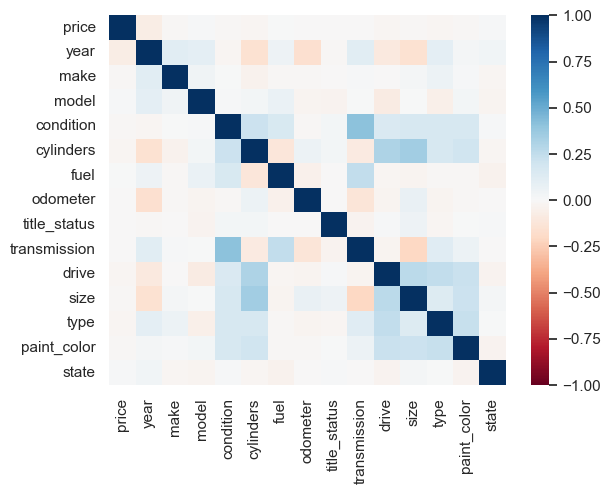

In [23]:
show_correlation(df, show_heatmap=True)

In [24]:
def visualize_data(title, df):
    show_col_box_plots(df, rescale=False)
    show_col_box_plots(df)
    show_col_hist(df)
    show_bar_plots(df)
    # This hangs/crashes on full data set.
    #show_pair_plots(df)
    show_bool_col_plots(df)


In [25]:
# TODO: disabled for cleaning full dataset becuase tends to crash.
# visualize_data(dataset_title, df)

Box Plots

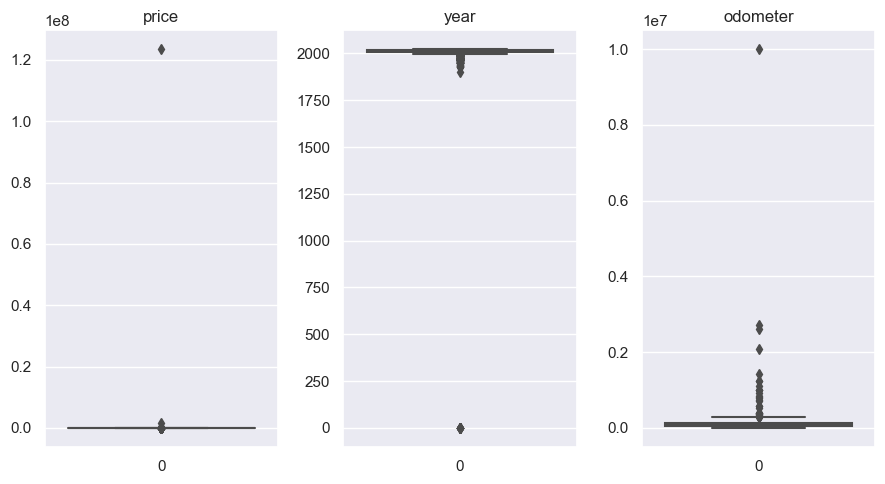

In [26]:
# TODO: cleanup
# Trying these one by one to find out which is failing.
show_col_box_plots(df, rescale=False)

Box Plots (normalized)

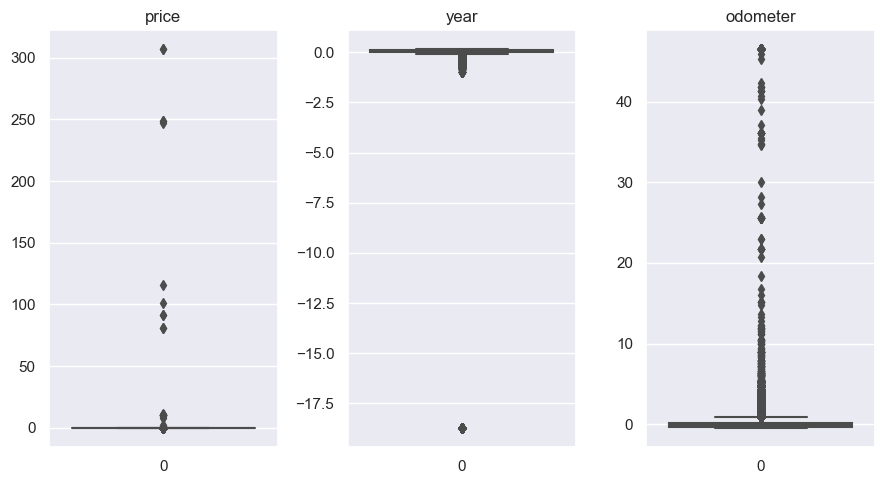

In [24]:
show_col_box_plots(df)


Histograms

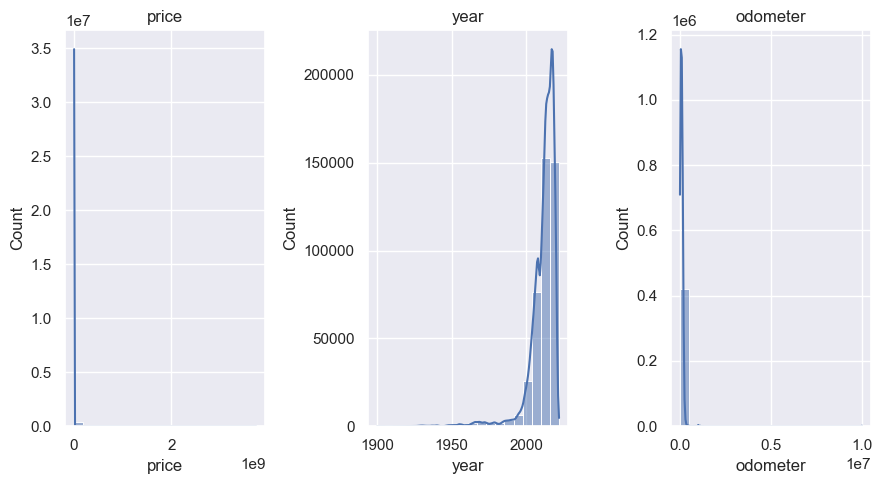

In [25]:
show_col_hist(df)


Bar Charts

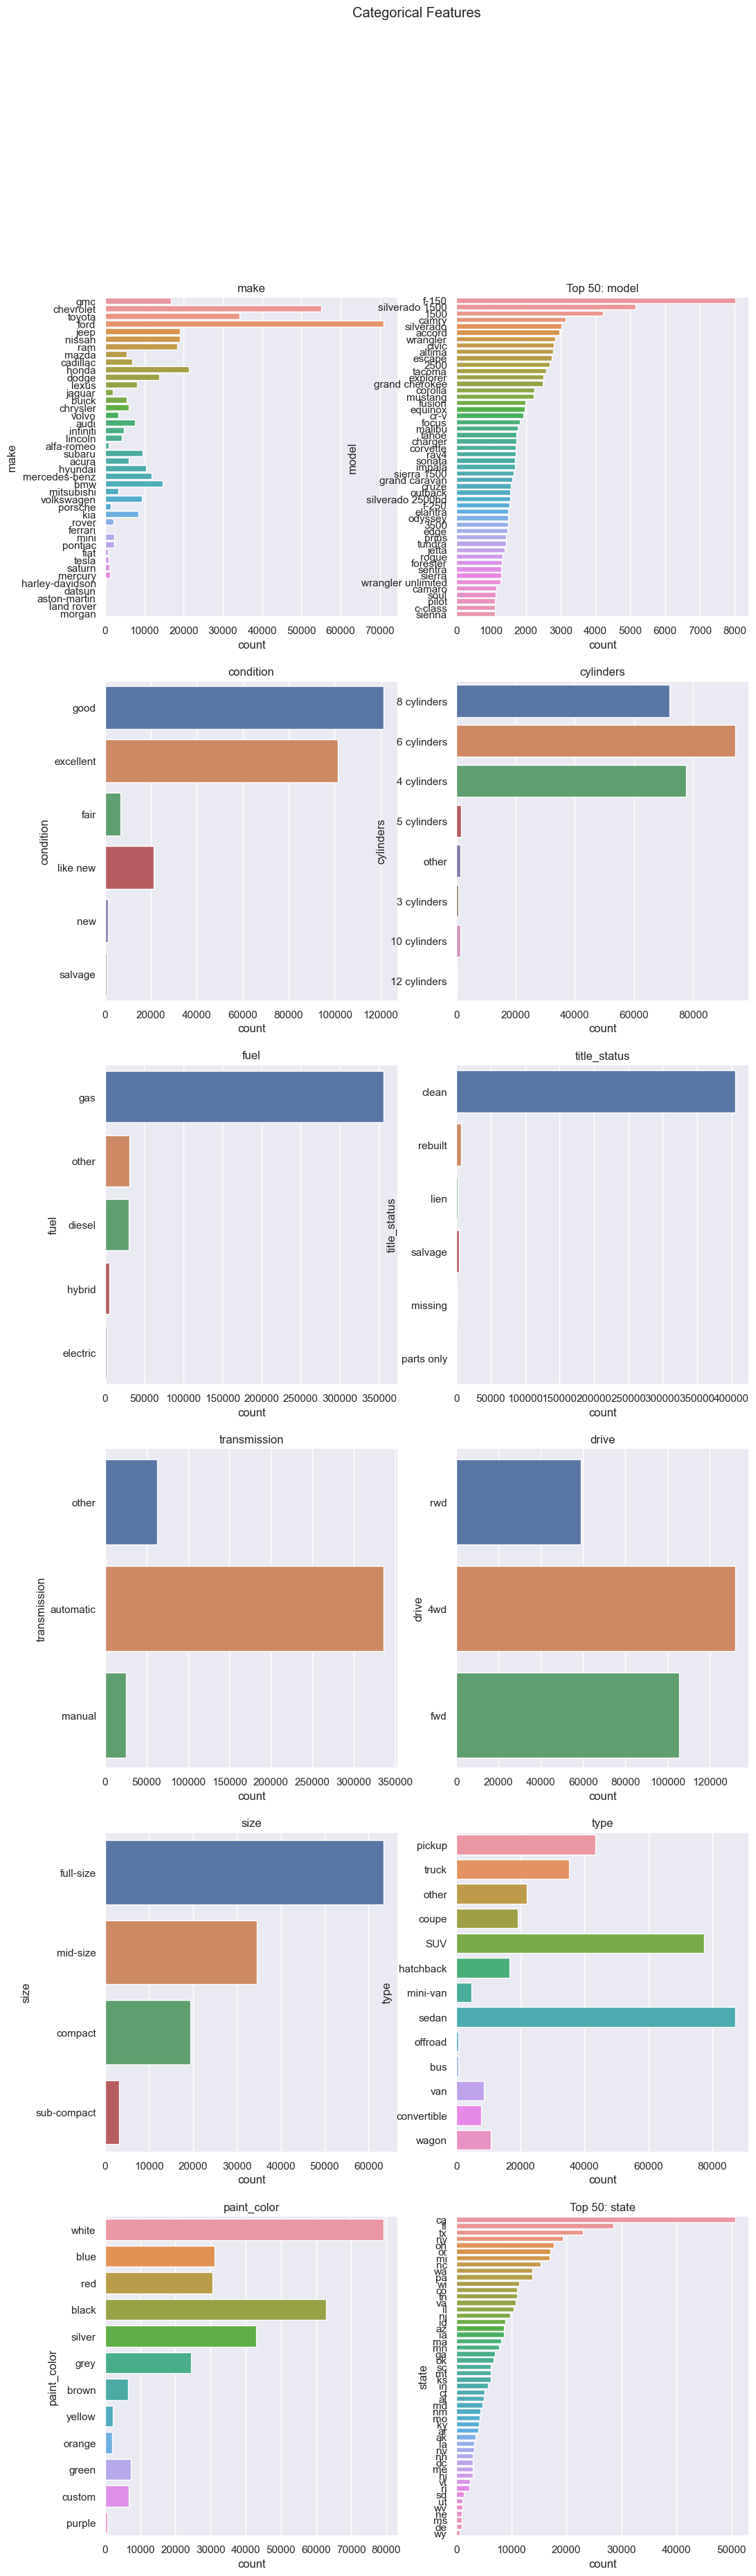

In [26]:
show_bar_plots(df)

Pair Plots

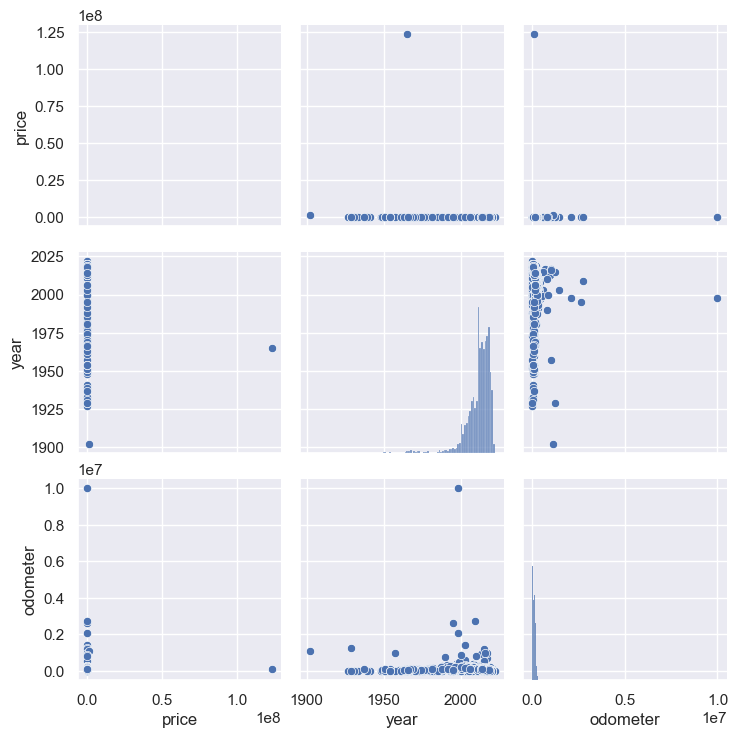

In [27]:
# On full dataset this never completes successfully.
if dataset['sample']:
    show_pair_plots(df)

In [28]:
show_bool_col_plots(df)

In [29]:
show_heading("Investigate Specific Columns")

def investigate_col(df, col):
    describe_data("For column " + col, df[[col]], verbose=True)

# Disabled, very verbose    
#for col in df.columns:
#    investigate_col(df, col)
   

None

Investigate Specific Columns

In [30]:
#investigate_col(df, 'sp_name')
# definitely drop sp_name

#investigate_col(df, 'bed')
# bed would be useful, but very few samples, drop it
# may be enough to use for full dataset without sampling

# drop dealer_zip, keep city instead
#investigate_col(df, 'city')

#investigate_col(df, 'cabin')
# cabin is useful for trucks, but lots of nulls, probably for non-trucks

#investigate_col(df, 'bed_height')
# in the sample, the only non-null value of bed-height is '--', drop it.


# bed_length is stored as a string with units in it instead of just numerically
# drop it, not worth the trouble probably, 

# body_type looks useful.

# engine_displacement looks relatively clean, can impute with mean

# engine_type and engine_cylinders are overlapping, and string values, seem problematic.

# wheelbase and width and height and bed_length are entered as strings rather than numeric

# front_legroom and back_legroom 


# city_fuel_economy looks like clean numeric column

# fuel_tank_volume is a string with (mostly) units of gallons in it.

# horsepower is numeric 
# power is string-based, drop it and keep horsepower

# is_cpo only shows as one value


# savings_amount is numeric, and think is something about MSRP or something
# scared it will skew regularization output with data it should not know; drop it.


### Outliers

The above box plots for the numeric features without any rescaling show that there are some outliers that we need to cleanup.


In [31]:
# Cap outliers in numeric columns based on number of standard deviations.
def cap_outliers(df, z_mult):
    df = df.copy()
    
    for colname in df.columns:
        if is_numeric_dtype(df[colname]):
            lower_limit = df[colname].mean() - z_mult * df[colname].std()
            upper_limit = df[colname].mean() + z_mult * df[colname].std()
            print(f"Capping column: {colname} lower={lower_limit} upper={upper_limit}")
            
            df[colname] = np.where(
                df[colname] > upper_limit, upper_limit,
                np.where(
                    df[colname] < lower_limit, lower_limit,
                    df[colname]
                )
            )

    return df

In [32]:
def clean_numeric_columns(df):
    numeric_cols = [cn for cn in df.columns if is_numeric_dtype(df[cn]) and not col_is_bool(df,cn)]
    numeric_cols = set(numeric_cols)
    numeric_cols.remove('price')  # do not change price

    #print("Numeric_cols:", numeric_cols)

    for col in numeric_cols:
        print("Cleaning numeric column:", col)
        df[col] = df[col].fillna(df[col].mean())
    
    return df

In [33]:
def clean_cat_columns(df):
    cat_cols = [cn for cn in df.columns if not is_numeric_dtype(df[cn]) and not col_is_bool(df,cn)]
    #print("cat_cols:", cat_cols)

    df = df.copy()
    for col in cat_cols:
        mv = df[col].mode()[0]
        nc = df[col].isnull().sum()
        print(f"Replacing {nc} null values in column '{col}' with mode='{mv}'")
        df[col] = df[col].fillna(mv)
    return df

#_ = clean_cat_columns(df)


In [34]:
show_heading("Data Cleaning")

df_cleaned = df.copy()

# Do some adjustments on particular columns based on meaning of columns.

# Drops rows without price information.
df_cleaned  = df_cleaned.dropna(subset=['price'])

# No zero or negative prices.
MIN_PRICE = 1
# Keep the max price to a reasonable value.
MAX_PRICE = 300000

df_cleaned = df_cleaned.drop(df[df['price'] < MIN_PRICE].index)
df_cleaned = df_cleaned.drop(df[df['price'] > MAX_PRICE].index)

# No years in the future.
MAX_YEAR = 2023
df_cleaned['year'] = np.where(df_cleaned['year'] > MAX_YEAR, MAX_YEAR, df_cleaned['year'])

# No huge odometer values.
MAX_MILES = 300000
df_cleaned['odometer'] = np.where(df_cleaned['odometer'] > MAX_MILES, MAX_MILES, df_cleaned['odometer'])


### This is specific to Cargurus dataset.
# Drop additional columns based on investigation.
if dataset['title'] == "Cargurus":
    more_drop_cols = ['bed', 'daysonmarket', 'dealer_zip', 'engine_cylinders', 'engine_type',
                      'franchise_dealer', 'franchise_make', 'listed_date', 'power',
                      'savings_amount', 'seller_rating', 'sp_name', 'torque',
                      'transmission_display', 'trim_name',
                     'is_cpo', 'is_oemcpo']


    df_cleaned = df_cleaned.drop(columns=more_drop_cols)

    # TODO: try to clean these measurement columns so we can use them.

    # And drop the columns which contain numeric values as strings with number and unit.
    string_unit_cols = ['back_legroom', 'bed_height', 'bed_length', 'front_legroom', 'fuel_tank_volume',
                        'height', 'length', 'maximum_seating', 'wheelbase', 'width']

    df_cleaned = df_cleaned.drop(columns=string_unit_cols)
    
    # before generic cleanup and imputation, set default values or na of columns where we have intrinsic/semantic
    # knowledge of the meaning.
    default_false_cols = ['fleet', 'frame_damaged', 'salvage', 'theft_title']
    df_cleaned[default_false_cols] = df_cleaned[default_false_cols].fillna(False)

##


# cap outliers beyond 3 std devs.
df_cleaned = cap_outliers(df_cleaned, z_mult=3)

# Impute value for missing numeric fields as mean
#df_cleaned['year'] = df_cleaned['year'].fillna(df_cleaned['year'].mean())
#df_cleaned['odometer'] = df_cleaned['odometer'].fillna(df_cleaned['odometer'].mean())

df_cleaned = clean_numeric_columns(df_cleaned)
    

# Replace categorical missing values with the mode of the column
df_cleaned = clean_cat_columns(df_cleaned)


# Cleanup boolean columns, also imputs missing values as mode of column
df_cleaned = clean_bool_columns(df_cleaned)

# reset the index for any dropped rows
df_cleaned = df_cleaned.reset_index(drop=True)


display(df_cleaned.describe())

Data Cleaning

Capping column: price lower=-27012.73241296992 upper=64800.334441870065
Capping column: year lower=1982.1393441121868 upper=2039.8782657265083
Capping column: odometer lower=-99540.37841096186 upper=285090.16664847906
Cleaning numeric column: year
Cleaning numeric column: odometer
Replacing 16172 null values in column 'make' with mode='ford'
Replacing 4678 null values in column 'model' with mode='f-150'
Replacing 151344 null values in column 'condition' with mode='good'
Replacing 160364 null values in column 'cylinders' with mode='6 cylinders'
Replacing 2594 null values in column 'fuel' with mode='gas'
Replacing 7734 null values in column 'title_status' with mode='clean'
Replacing 1822 null values in column 'transmission' with mode='automatic'
Replacing 120204 null values in column 'drive' with mode='4wd'
Replacing 282877 null values in column 'size' with mode='full-size'
Replacing 85886 null values in column 'type' with mode='sedan'
Replacing 117102 null values in column 'paint_color'

[]

,price,year,odometer
count,393908.000000,393908.000000,393908.000000
mean,18671.371576,2011.406247,92647.432999
std,14188.929752,7.624027,63521.544869
min,1.000000,1982.139344,0.000000
25%,7000.000000,2008.000000,38252.000000
50%,15000.000000,2013.000000,87595.000000
75%,27590.000000,2017.000000,135000.000000
max,64800.334442,2022.000000,285090.166648


In [35]:
# NOTE: Set verbose=true to see description of each column in more detail.

describe_data("Cleaned " + dataset_title, df_cleaned, verbose=False)

Dataset Name: Cleaned Craigslist

Info

Shape: (393908, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393908 entries, 0 to 393907
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         393908 non-null  float64
 1   year          393908 non-null  float64
 2   make          393908 non-null  object 
 3   model         393908 non-null  object 
 4   condition     393908 non-null  object 
 5   cylinders     393908 non-null  object 
 6   fuel          393908 non-null  object 
 7   odometer      393908 non-null  float64
 8   title_status  393908 non-null  object 
 9   transmission  393908 non-null  object 
 10  drive         393908 non-null  object 
 11  size          393908 non-null  object 
 12  type          393908 non-null  object 
 13  paint_color   393908 non-null  object 
 14  state         393908 non-null  object 
dtypes: float64(3), object(12)
memory usage: 45.1+ MB


None

Sample

,price,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,az
1,11900.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ar
2,21000.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,fl
3,1500.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ma
4,4900.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,nc


Types

price           float64
year            float64
make             object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

Null Proportion

price           0.0
year            0.0
make            0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
size            0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

Null Counts


price           0
year            0
make            0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

Box Plots

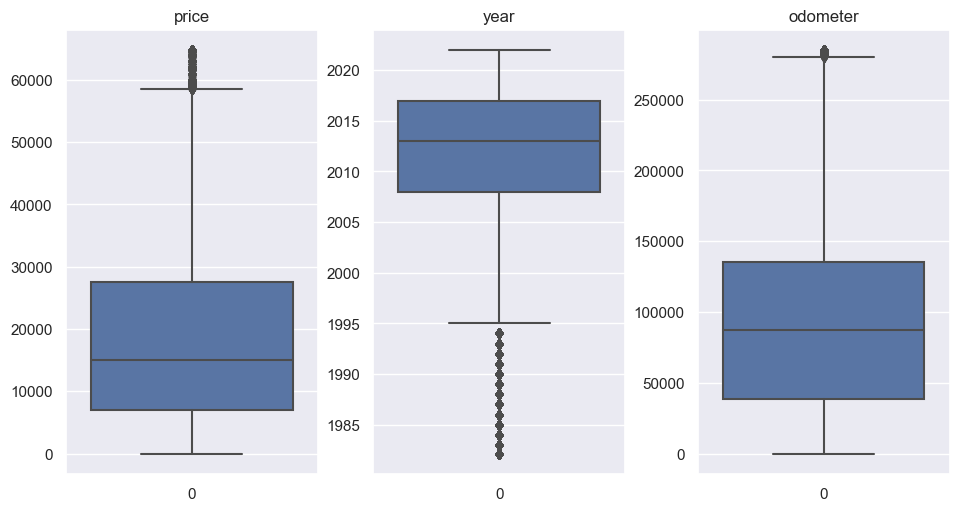

Box Plots (normalized)

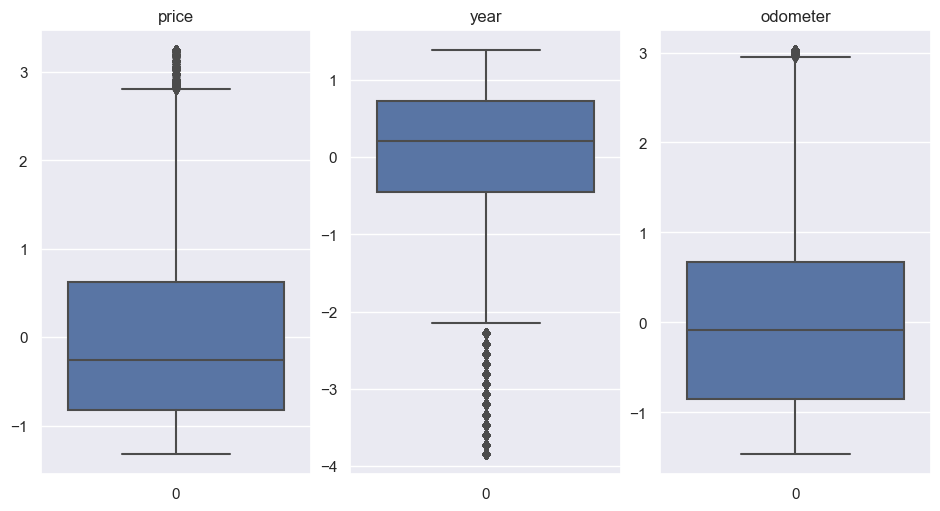

Histograms

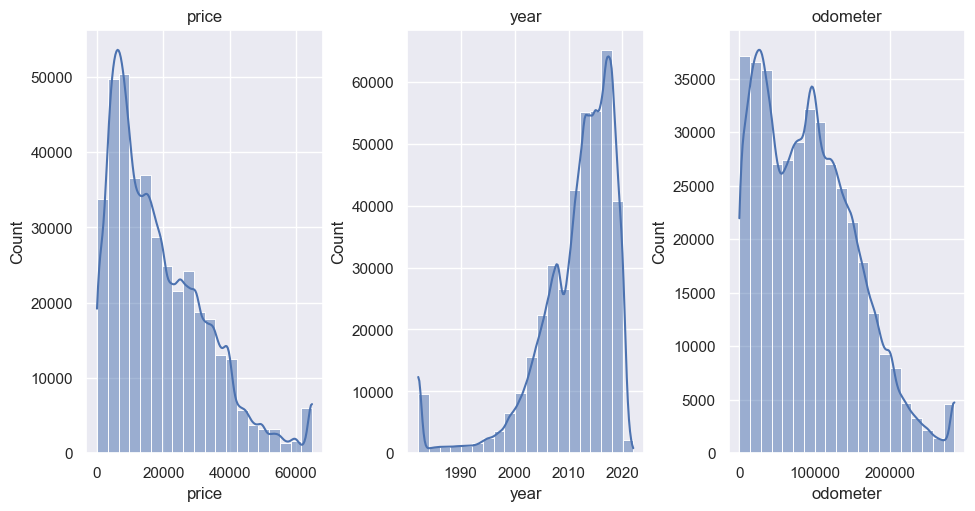

Bar Charts

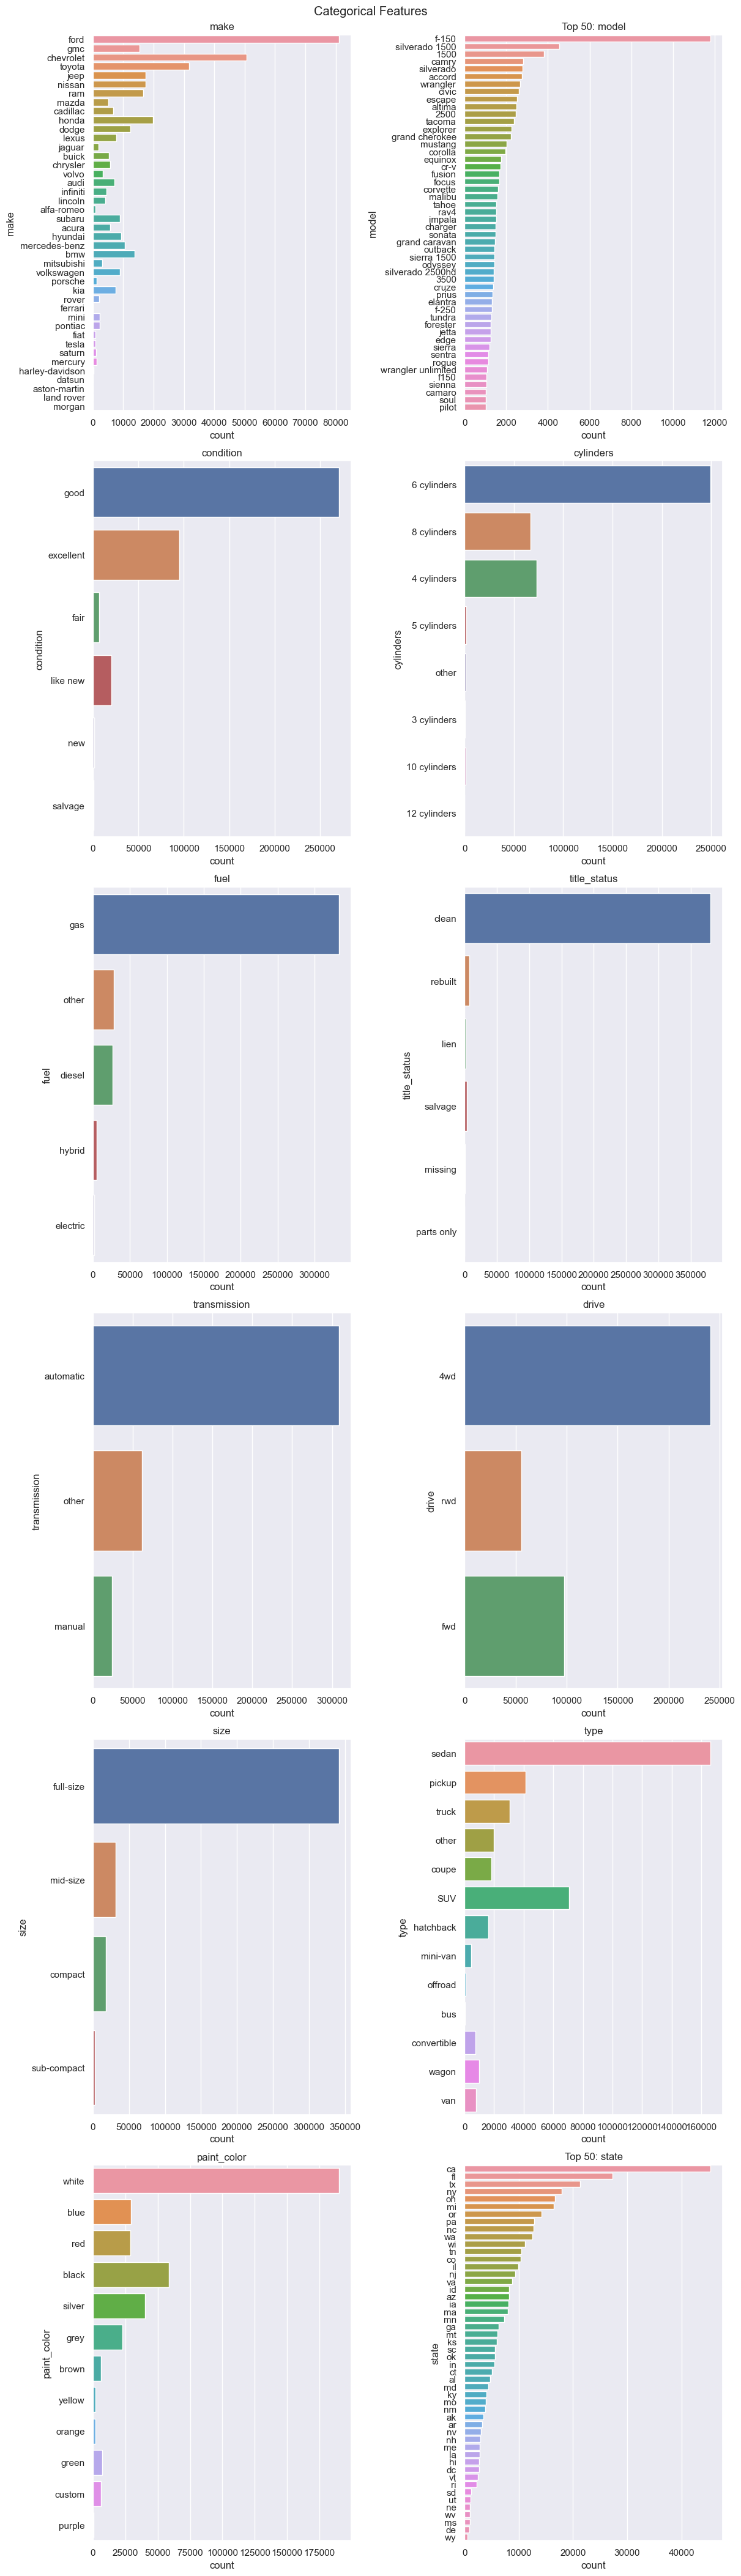

In [37]:
visualize_data("Cleaned " + dataset_title, df_cleaned)

In [38]:
# TODO: having error in show_col_box_plots
print("cols:", df_cleaned.columns)
#cols = ['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders']
cols = ['price']#, 'year', 'manufacturer']#
#cols = ['model', 'condition', 'cylinders']

display(df_cleaned[cols].describe())

print("mark1")
#data = df_cleaned[cols].copy()
data = df['price']

display(data)
print("mark2")
show_heading("testing")
if hasattr(data, "shape"):
    if len(data.shape) == 1:
        print("shape == 1")
        if np.isscalar(data[0]):
            print("is scalar")
        else:
            print("not scalar")
    else:
        print("len > 1")
else:
    print("no shape")
    
# TODO: you are here
print("mark3")
#show_col_box_plots(df_cleaned[cols])
def test_show_col_box_plots(df):
    #columns_to_plot = [cn for cn in df.columns if is_numeric_dtype(df[cn]) and not col_is_bool(df,cn)]
    columns_to_plot = cols
    rescale = True


    # don't put more than 4 box plots in a column.
    n_cols = 4
    n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

    fig = plt.figure(figsize=(12, n_rows * 5))

    print("head")
    display(df.head())
    df = df_cleaned.copy()
    df = df.fillna(0)

    for idx, column in enumerate(columns_to_plot):
        axis = fig.add_subplot(n_rows, n_cols, idx + 1)

        data = df[column]
        if rescale:
            data = zscore(data)
        
        display(data)
        sns.boxplot(data=data, ax=axis) 
        axis.set_title(column)

    plt.tight_layout()
    plt.show()

print("calling test")
# TODO: test_show_col_box_plots(df)

cols: Index(['price', 'year', 'make', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')


,price
count,393908.000000
mean,18671.371576
std,14188.929752
min,1.000000
25%,7000.000000
50%,15000.000000
75%,27590.000000
max,64800.334442


mark1


0          6000
1         11900
2         21000
3          1500
4          4900
          ...  
426875    23590
426876    30590
426877    34990
426878    28990
426879    30590
Name: price, Length: 426880, dtype: int64

mark2


testing

shape == 1
is scalar
mark3
calling test


Correlation Heatmap

,price,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
price,1.000000,0.438985,-0.050098,0.017549,0.139608,0.259542,-0.063669,-0.502570,-0.089648,0.253593,-0.091006,-0.054052,0.009349,-0.016665,0.013141
year,0.438985,1.000000,0.030807,0.061500,0.110607,-0.080190,0.126249,-0.429417,-0.016402,0.190434,-0.121057,-0.036014,-0.032532,-0.021293,0.010088
make,-0.050098,0.030807,1.000000,-0.000971,-0.017127,-0.152383,-0.017888,0.030986,0.014728,-0.000515,-0.055769,0.007195,0.032088,0.004675,-0.013449
model,0.017549,0.061500,-0.000971,1.000000,-0.001056,0.041790,0.075761,-0.005766,-0.012237,0.014384,-0.097584,0.000975,-0.101613,-0.004050,0.004745
condition,0.139608,0.110607,-0.017127,-0.001056,1.000000,0.089275,0.077876,-0.134774,-0.009135,0.166821,-0.051195,-0.053809,0.062939,0.018832,0.041168
cylinders,0.259542,-0.080190,-0.152383,0.041790,0.089275,1.000000,-0.033700,-0.004801,-0.064327,0.104733,-0.062771,-0.052637,0.055257,0.045581,0.027754
fuel,-0.063669,0.126249,-0.017888,0.075761,0.077876,-0.033700,1.000000,-0.206980,-0.011846,0.276414,0.021713,-0.012819,-0.104343,-0.064843,-0.024894
odometer,-0.502570,-0.429417,0.030986,-0.005766,-0.134774,-0.004801,-0.206980,1.000000,0.002030,-0.368630,-0.049764,0.046533,0.045122,0.039021,0.009396
title_status,-0.089648,-0.016402,0.014728,-0.012237,-0.009135,-0.064327,-0.011846,0.002030,1.000000,-0.057797,0.006344,0.013371,0.010037,-0.009686,0.003638
transmission,0.253593,0.190434,-0.000515,0.014384,0.166821,0.104733,0.276414,-0.368630,-0.057797,1.000000,0.044764,-0.061878,-0.027969,-0.052320,-0.006471


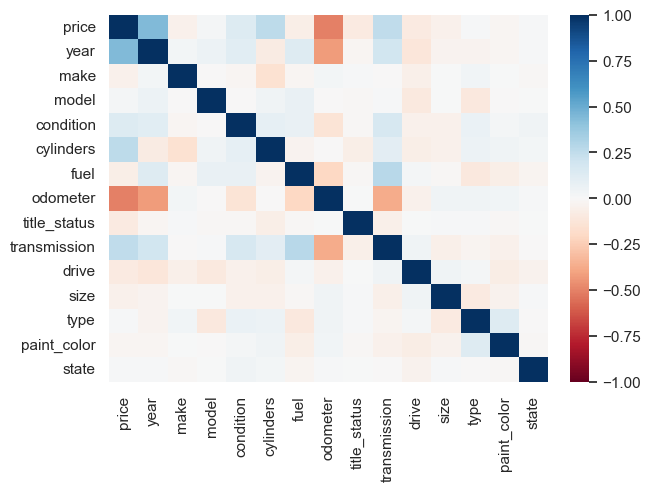

In [39]:
# Let's reexamine the correlation heatmap after cleaning up the outliers and missing values.
show_correlation(df_cleaned, show_heatmap=True)

In [40]:
show_heading("Correlation to Price")

def price_corr(df):   
    df = df.copy()
    
    for colname in df.columns:
        if is_numeric_dtype(df[colname]):
            #print("norm:", colname)
            df[colname] = zscore(df[colname])
        else:
            #print("cat:", colname)
            df[colname] = df[colname].astype("category").cat.codes
    result = df.corr(numeric_only=False)
    
    display(result['price'])

price_corr(df_cleaned)

Correlation to Price

price           1.000000
year            0.438985
make           -0.050098
model           0.017549
condition       0.139608
cylinders       0.259542
fuel           -0.063669
odometer       -0.502570
title_status   -0.089648
transmission    0.253593
drive          -0.091006
size           -0.054052
type            0.009349
paint_color    -0.016665
state           0.013141
Name: price, dtype: float64

## Phase One Findings


### Selection of Dataset for Continued Analysis

The Carvana dataset provides very few columns(`Name,Year,Miles,Price`), and a much smaller set of samples than the other datasets.

The CarGurus dataset has the largest rows and the most feature columns avaiable(at 66).
However, it only provides location data as zip code, longitude and latitude, which would make analyzing the effect on price from different areas more difficult since would prefer to just compare prices across US states.

Both the Craigslist and Carvana datasets have some data cleaning work required to remove outliers as well as signficiant numbers of null values.

The TrueCar dataset is by far the cleanest dataset, having no null values, and more columsn than the Carvana dataset. However, the columns available would only allow some of the investigations we have in mind. 
It provides Price,Year,Mileage,City,State,Vin,Make,Model. Vin is of little use without advanced preprocessing based on VIN coding, so the only advantage in features it providese to the Carvana dataset are from location based on `City, State`.

The Craigslist dataset is most amenable to the investigations planned in terms of the columns available. This is because it includes a column for the state location, the same basic make,  model, price, mileage and year information common to all the datasets, but also has a number of additional feature columns which may affect price.
The complete columns are: 
`id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,  fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,
description,county,state,lat,long,posting_date`

The rest of our discussion will focus on the Craigslist dataset specifically.

### Conclusions from Visualizations

The pair plots show that price is related significantly to the year and odomoter values.

The histograms for price and odometer show distributions skewed towards more frequent values on the lower side, while the histogram for the year shows a distribution skewed towards more frequent higher (recent) years.



### Features

It is clear from the correlation values that price is correlated with year of the car. And it is also apparent that the odomoter mileage is negatively correlated with the price. These are not surprising findings.

Other relationships are less obvious from the graphs. This is likely to be partly due to most of the features being categorical and not necessarily ordered in a meaningfull way before correlations were calculated.

There are a significant number of null values remaining in the categorical data after the data cleaning we have already done. For example, cylinders column is missing in over 41% of the rows.

#### Null Value Proportion by Column

    price           0.000000
    year            0.002588
    manufacturer    0.039755
    model           0.011291
    condition       0.396377
    cylinders       0.417314
    fuel            0.006351
    odometer        0.011997
    title_status    0.020936
    transmission    0.006351
    drive           0.312162
    size            0.717008
    type            0.215949
    paint_color     0.310750
    state           0.000000




## Limitations

During this phase used sampled 1% of the larger datasets to speed up initial analysis and debugging of code.
Phase two of the project will use the full Craigslist dataset.

Only preliminary data cleaning has been done. Imputation for missing values that remain is still needed.

## Phase Two Plans

The data is able to support most of the investigations planned for phase two.

Specifically, for phase two we will go deeper into answering these questions:

- How much make and model, condition and other features affect prices of vehicles of the same age. 
- How location affects the price of similar vehicles.
- How well a regression model built for this data will perform on test data.
- Which features are most useful for a regression model.

However, I was not able to locate datasets suitable to measuring the relationship between new car sales and used car prices.

For phase two of the project, the plan is to:

1. Begin by completing data cleanup of the Craigslist dataset, especially imputation of missing categorical feature values.
2. Continue exploratory data analysis into the price effect of different features.
3. Create a baseline linear regression model to predict price.
4. Create lasso and ridge regression models for price to see how they compare to baseline.
5. Use XGBoost library to create a regression model and also evaluate feature importance.
6. Create a report and presentation based on the findings.

If time is available to do additional work beyond the plan above, then I also plan to evaluate using Random Cut Forest for regression and evaluating feature importance and compare the results with XGBoost.

Lastly, time permitting, I plan to use [Streamlit.io](https://streamlit.io/) to create a web interface for serving an inference endpoint so that a user can input the feature values for a used car and see the price the model predicts.

The report and code to reproduce it will be available via GitHub to interested parties(professor, classmates, other peers) as well as stakeholders interested in how predictable used car prices are with this model who can view the report and use the online inference web interface.




## Write a version of this for Craigslist instead of Cargurus

We dropped a number of columns because they are obviously not directly useful, such as lat/long.

For example vin and listing_id are unique values not useful for a regression model.

These are the columns we dropped before further cleaning the dataset.

- vin
- description
- listing_id
- major_options
- wheel_system
- trimId
- sp_id
- main_picture_url
- latitude
- longitude
            
These columns we dropped for having all null values in our sample:

- is_certified
- combine_fuel_economy
- vehicle_damage_category

These columns we are dropping because we do not expect them to contribute to the model.

We drop columns related to how long on market, or who is selling it
i.e. listing_date, seller_rating, daysonmarket, franchise_dealer, franchise_make, etc.


- listing_date
- sp_name - this appears to be the dealer name.
- seller_rating
- daysonmarket

Some columns we drop because the data is redundant.

- dealer_zip - using city as location instead.
- transmission_display - keeping transmission only.

We drop some columns because the categorical data is too strange

- bed_height - contains only one value when sampled '--' or nulls
- engine_cylinders
- engine_type - these appear to contain values for the same purpose instead of separate meanings, and overlap.

## TODOs

- [ ] faceted histogram of prices over important looking categorical variables.
- [ ] overlapping histogram of related numeric variables and price.
- [x] impute missing boolean values
- [x] impute missing numeric values
- [x] imput missing categorical values
- [ ] Save cleaned data to separate CSV for use in modeling/regression.

In [41]:
# Write out the cleaned dataset to a new CSV file.
from datetime import datetime

rn = datetime.now()
dts = rn.strftime("%Y_%m_%d_%H_%M_%S")

ss = "sampled" if dataset['sample'] else "full"

dest_path = f"{dataset['title'].lower()}_{ss}_cleaned_{dts}.csv"
print(f"Saving cleaned dataframe to {dest_path}")
df_cleaned.to_csv(dest_path, index=False)


Saving cleaned dataframe to craigslist_full_cleaned_2023_03_12_11_56_20.csv
